# Análise da evolução da carteira de crédito das cooperativas por UF do Brasil 



O objetivo desta análise é identificar a participação do cooperativismo de crédito no Brasil e sua evolução no decorrer do tempo. 

base de dados:
a base de dados está disponibilizada pelo Bacen no formato CSV. em: 
https://dadosabertos.bcb.gov.br/dataset/scr_data



In [10]:
# as bibliotecas disponíveis para plotar os gráficos e manupulação dedados:
import pandas as pd
#import plotly.express as px
# Biblioteca para plotar mapa com gráfico de calor
##import folium
f#rom folium.plugins import HeatMap
#from folium import plugins
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# carregar bancos de dados
# foram carregados os dados dos últimos 12 meses movimento que foram criados em arquivo python separados
df = pd.read_csv(r"D:\Projetos_Analytics\01.cooperativas\01.Coop_Brasil\base.csv")

In [3]:
#Preparação dos dados

dados = df
#transformar a coluna database, de string para datatime
dados['data_base'] = pd.to_datetime(dados['data_base'], format='%Y-%m-%d')
# Deletar colunas desnecessárias para análise
dados = dados.drop(columns=[ 'ocupacao', 'cnae_secao', 'cnae_subclasse', 'porte',
'a_vencer_ate_90_dias', 'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias', 
'a_vencer_de_1081_ate_1800_dias','a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias',
])
dados = dados.drop(columns=[ 'origem', 'indexador', 'numero_de_operacoes', 'a_vencer_de_1801_ate_5400_dias'])
# transformar as colunas numéricas, que estão no formato string para float.
## Os números estão separados por virgulas, por isto foi usado repleace para transformar virgula em ponto 
dados['carteira_ativa'] = dados['carteira_ativa'].str.replace(',', '.').astype(float)
dados['carteira_inadimplida_arrastada'] = dados['carteira_inadimplida_arrastada'].str.replace(',', '.').astype(float)
dados['ativo_problematico'] = dados['ativo_problematico'].str.replace(',', '.').astype(float)


Preparar os dados para analisar a carteira geral por estado por tipo de instituição e postetiormente comparar com o cooperativismo.
será criado uma visão do total por estado e sua evolução e uma visão da share do cooperativimo por estado e sua evolução.


# envidamento total por estados:


In [24]:
# Total do envidamento por estados:
## Agrupar
dados_group = dados.groupby(['data_base', 'uf'])[['carteira_ativa', 'carteira_inadimplida_arrastada']].sum().reset_index()
dados_group = dados_group.loc[dados_group['data_base']== '2023-05-31 00:00:00']
dados_group = dados_group.rename(columns  = {'uf': 'sigla'})
dados_group = dados_group[['sigla', 'carteira_ativa']]

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


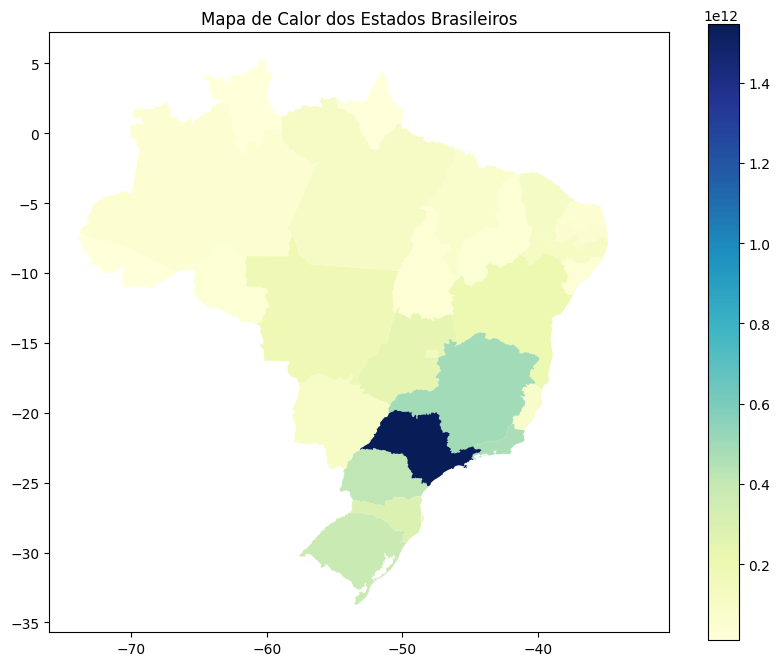

In [31]:
# Carregue o shapefile dos estados brasileiros
#arquivo disponível para dowload em:
#  https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1&resourcekey=0-po0pdYgc-QZ5Pt13twjIsg
brasil = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")
# Combine o DataFrame dos estados com o DataFrame do mapa de calor
brasil = brasil.merge(dados_group, on='sigla',how='left')
# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
brasil.plot(column='carteira_ativa', cmap='YlGnBu', ax=ax, legend=True)
plt.title('Mapa de Calor dos Estados Brasileiros')
plt.show()


Comentários:
    A região sudeste é onde existe maior carteira de crédito, principalmente no município de São Paulo.

# carteira do cooperativismo:


In [36]:
#Filtrar cooperativas:
dados2 = dados
dados2 = dados2.loc[dados2['tcb'] == 'Cooperativas']

# Total do envidamento por estados:
## Agrupar
dados_coop = dados2.groupby(['data_base', 'uf'])[['carteira_ativa', 'carteira_inadimplida_arrastada']].sum().reset_index()
dados_coop = dados_coop.loc[dados_coop['data_base']== '2023-05-31 00:00:00']
dados_coop = dados_coop.rename(columns  = {'uf': 'sigla'})
dados_coop = dados_coop[['sigla', 'carteira_ativa']]

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


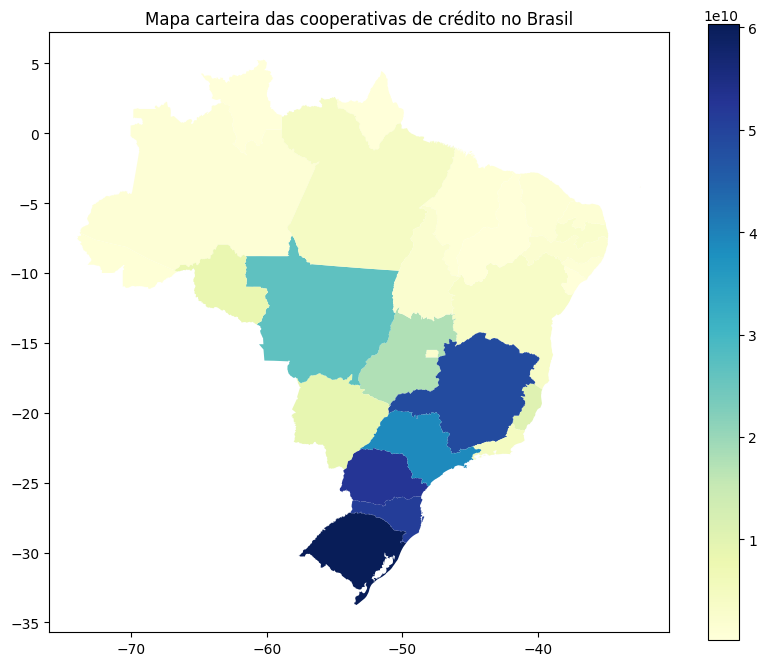

In [38]:
# Carregue o shapefile dos estados brasileiros
brasil2 = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")

# Combine o DataFrame dos estados com o DataFrame do mapa de calor
brasil_coop = brasil2.merge(dados_coop, on='sigla',how='left')

# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
brasil_coop.plot(column='carteira_ativa', cmap='YlGnBu', ax=ax, legend=True)
plt.title('Mapa carteira das cooperativas de crédito no Brasil')
plt.show()


Obs: 
    O cooperativismo de crédito tem maior concentração nas regiões sul e sudeste do Brasil, sendo maior na região sul e em terceiro lugar na região centroeste


Market share cooperativismo:

In [39]:
dados2  =  dados

In [ ]:
# RASCUNHO:

In [42]:
# juntar dividir o saldo devedor do cooperativismo com o saldo devedor total:
bench = dados_group.merge(dados_coop, on = 'sigla', how = 'left')
# criar coluna com valor de bench mark
bench['benchmark'] = bench['carteira_ativa_y'] / bench['carteira_ativa_x'] *100
# Separar linhas para o gráfico:
bench = bench[['sigla', 'benchmark']]

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


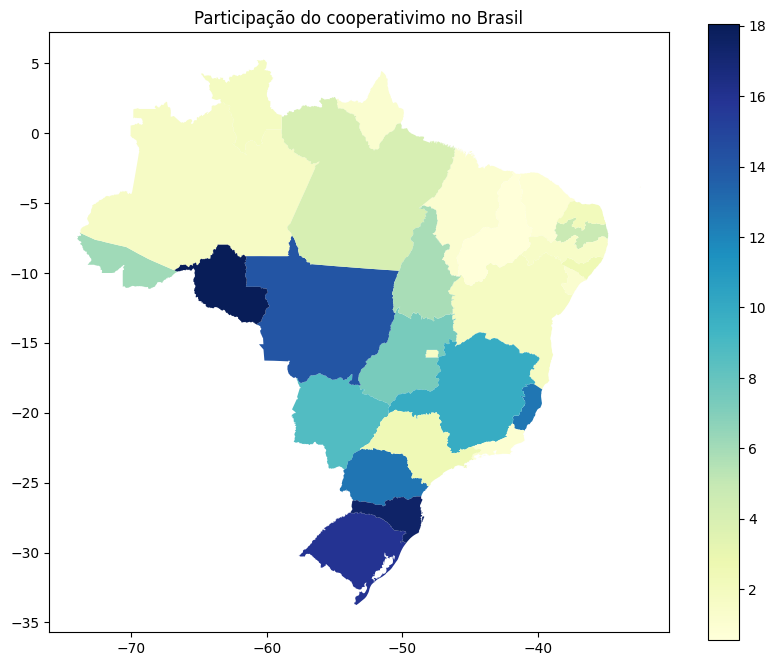

In [46]:
#Gráfico:
# Carregue o shapefile dos estados brasileiros
brasil3 = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")

# Combine o DataFrame dos estados com o DataFrame do mapa de calor
bench_brasil = brasil3.merge(bench, on='sigla',how='left')

# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
bench_brasil.plot(column='benchmark', cmap='YlGnBu', ax=ax, legend=True)
plt.title('Participação do cooperativimo no Brasil')
plt.show()

In [47]:
bench_brasil

,id,nome,sigla,regiao_id,codigo_ibg,geometry,benchmark
0,1,Acre,AC,3,12,"POLYGON ((-73.60818 -7.20194, -72.86963 -7.528...",6.093232
1,2,Alagoas,AL,4,27,"POLYGON ((-35.46516 -8.82549, -35.46626 -8.827...",2.591987
2,3,Amazonas,AM,3,13,"POLYGON ((-67.32553 2.03012, -67.32234 2.01741...",1.695891
3,4,Amapá,AP,3,16,"POLYGON ((-51.18168 4.00889, -51.17900 3.99812...",1.126569
4,5,Bahia,BA,4,29,"POLYGON ((-39.28820 -8.56290, -39.28229 -8.567...",1.783684
5,6,Ceará,CE,4,23,"MULTIPOLYGON (((-40.01804 -2.83698, -40.00587 ...",0.893572
6,7,Distrito Federal,DF,5,53,"POLYGON ((-47.30861 -16.03549, -47.31095 -16.0...",1.624697
7,8,Espírito Santo,ES,2,32,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804...",12.588933
8,9,Goiás,GO,5,52,"POLYGON ((-50.15776 -12.41195, -50.15901 -12.4...",7.320383
9,10,Maranhão,MA,4,21,"MULTIPOLYGON (((-47.03102 -8.98549, -47.02113 ...",1.042953
